# **P01-Vacation_Price_predict**
---

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor 

## Import Dataset

In [7]:
df=pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\MLDS\Datasets\vacations_dataset.csv")
df.head()

,Places,No_of_days,Distance,Persons,Locations,Day,Travel_Type,Lunch_include,Stay,Price_per_day,Total_Cost,Plan
0,Indore,7,761,4,3,Mon,Air,No,Yes,3133,184078,No
1,Andaman,6,737,3,3,Sun,Both,No,Yes,4166,125601,No
2,Indore,6,707,2,2,Sat,Both,Yes,No,4254,78705,No
3,Indore,7,894,4,2,Mon,Air,No,Yes,4008,220062,Yes
4,Hyderabad,7,754,4,4,Thu,Road,No,No,3255,137215,No


In [8]:
df.describe()

,No_of_days,Distance,Persons,Locations,Price_per_day,Total_Cost
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03
mean,13.484800,2549.957400,7.864400,7.927000,9605.21200,4.226865e+06
std,4.800581,1372.318385,3.834234,3.813841,3980.28722,4.323355e+06
min,6.000000,500.000000,2.000000,2.000000,3001.00000,4.771400e+04
25%,9.000000,1243.750000,5.000000,5.000000,5885.00000,7.583105e+05
50%,14.000000,2488.000000,8.000000,8.000000,9880.00000,2.984378e+06
75%,18.000000,3777.250000,11.000000,11.000000,13510.25000,6.465010e+06
max,20.000000,4999.000000,14.000000,14.000000,14999.00000,1.813545e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Places         5000 non-null   object
 1   No_of_days     5000 non-null   int64 
 2   Distance       5000 non-null   int64 
 3   Persons        5000 non-null   int64 
 4   Locations      5000 non-null   int64 
 5   Day            5000 non-null   object
 6   Travel_Type    5000 non-null   object
 7   Lunch_include  5000 non-null   object
 8   Stay           5000 non-null   object
 9   Price_per_day  5000 non-null   int64 
 10  Total_Cost     5000 non-null   int64 
 11  Plan           5000 non-null   object
dtypes: int64(6), object(6)
memory usage: 468.9+ KB


In [10]:
df.corr(numeric_only=True)

,No_of_days,Distance,Persons,Locations,Price_per_day,Total_Cost
No_of_days,1.000000,0.554375,0.765660,0.766905,0.642213,0.796993
Distance,0.554375,1.000000,0.590519,0.600296,0.952664,0.605634
Persons,0.765660,0.590519,1.000000,0.757970,0.670833,0.858656
Locations,0.766905,0.600296,0.757970,1.000000,0.677831,0.801589
Price_per_day,0.642213,0.952664,0.670833,0.677831,1.000000,0.684989
Total_Cost,0.796993,0.605634,0.858656,0.801589,0.684989,1.000000


## Treat Null & outlier Values

In [11]:
df.isnull().sum()

Places           0
No_of_days       0
Distance         0
Persons          0
Locations        0
Day              0
Travel_Type      0
Lunch_include    0
Stay             0
Price_per_day    0
Total_Cost       0
Plan             0
dtype: int64

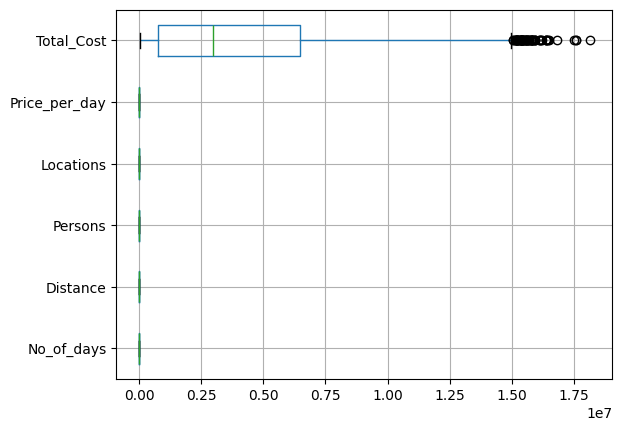

In [12]:
df.boxplot(vert=False)
plt.show()

In [13]:
Q1_tip=df['Total_Cost'].quantile(.25)
Q3_tip=df['Total_Cost'].quantile(.75)
IQR_tip=Q3_tip-Q1_tip
UW=Q3_tip+1.5*IQR_tip
LW=Q1_tip-1.5*IQR_tip
print("LW: ",LW,"\nUW :",UW)
df.loc[df['Total_Cost']>UW,'Total_Cost']=df['Total_Cost'].median()
df.loc[df['Total_Cost']<LW,'Total_Cost']=df['Total_Cost'].median()

LW:  -7801738.375 
UW : 15025058.625


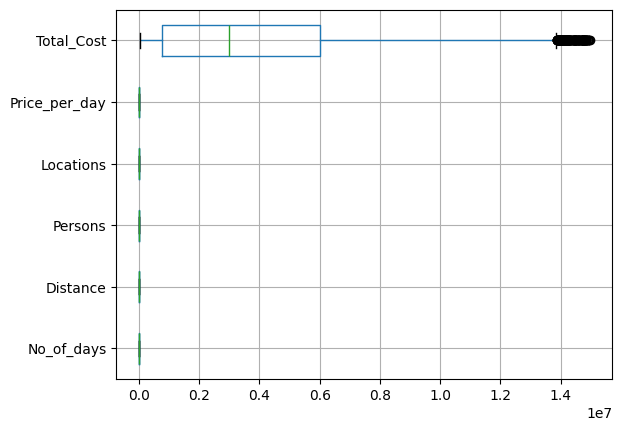

In [14]:
df.boxplot(vert=False)
plt.show()

In [15]:
df.head()

,Places,No_of_days,Distance,Persons,Locations,Day,Travel_Type,Lunch_include,Stay,Price_per_day,Total_Cost,Plan
0,Indore,7,761,4,3,Mon,Air,No,Yes,3133,184078.0,No
1,Andaman,6,737,3,3,Sun,Both,No,Yes,4166,125601.0,No
2,Indore,6,707,2,2,Sat,Both,Yes,No,4254,78705.0,No
3,Indore,7,894,4,2,Mon,Air,No,Yes,4008,220062.0,Yes
4,Hyderabad,7,754,4,4,Thu,Road,No,No,3255,137215.0,No


## Encode Categorical Data

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [17]:
numerical_cols

Index(['No_of_days', 'Distance', 'Persons', 'Locations', 'Price_per_day',
       'Total_Cost'],
      dtype='object')

In [18]:
categorical_cols

Index(['Places', 'Day', 'Travel_Type', 'Lunch_include', 'Stay', 'Plan'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])
    # Print the mapping for each category
    categories = df[column].unique()
    print(f"Column- {column}")
    for category in categories:
        print(f"{label_encoder.inverse_transform([category])[0]} : {category}")
    print("\n")

Column- Places
Indore : 4
Andaman : 0
Hyderabad : 3
Ladakh : 6
Delhi : 1
Jammu-Kashmir : 5
Mumbai : 8
Pune : 9
Lakshadweep : 7
Goa : 2


Column- Day
Mon : 1
Sun : 3
Sat : 2
Thu : 4
Wed : 6
Tue : 5
Fri : 0


Column- Travel_Type
Air : 0
Both : 1
Road : 2


Column- Lunch_include
No : 0
Yes : 1


Column- Stay
Yes : 1
No : 0


Column- Plan
No : 0
Yes : 1




## Check Correlation

In [20]:
df.head(10)

,Places,No_of_days,Distance,Persons,Locations,Day,Travel_Type,Lunch_include,Stay,Price_per_day,Total_Cost,Plan
0,4,7,761,4,3,1,0,0,1,3133,184078.0,0
1,0,6,737,3,3,3,1,0,1,4166,125601.0,0
2,4,6,707,2,2,2,1,1,0,4254,78705.0,0
3,4,7,894,4,2,1,0,0,1,4008,220062.0,1
4,3,7,754,4,4,4,2,0,0,3255,137215.0,0
5,6,6,913,4,3,3,0,0,1,4135,211186.0,0
6,3,6,645,2,3,4,2,0,0,3651,60628.0,0
7,3,7,709,4,3,6,0,0,1,4636,271071.0,1
8,4,6,930,2,2,6,0,1,0,3426,80883.0,0
9,0,7,507,3,3,5,2,1,1,3251,93251.0,0


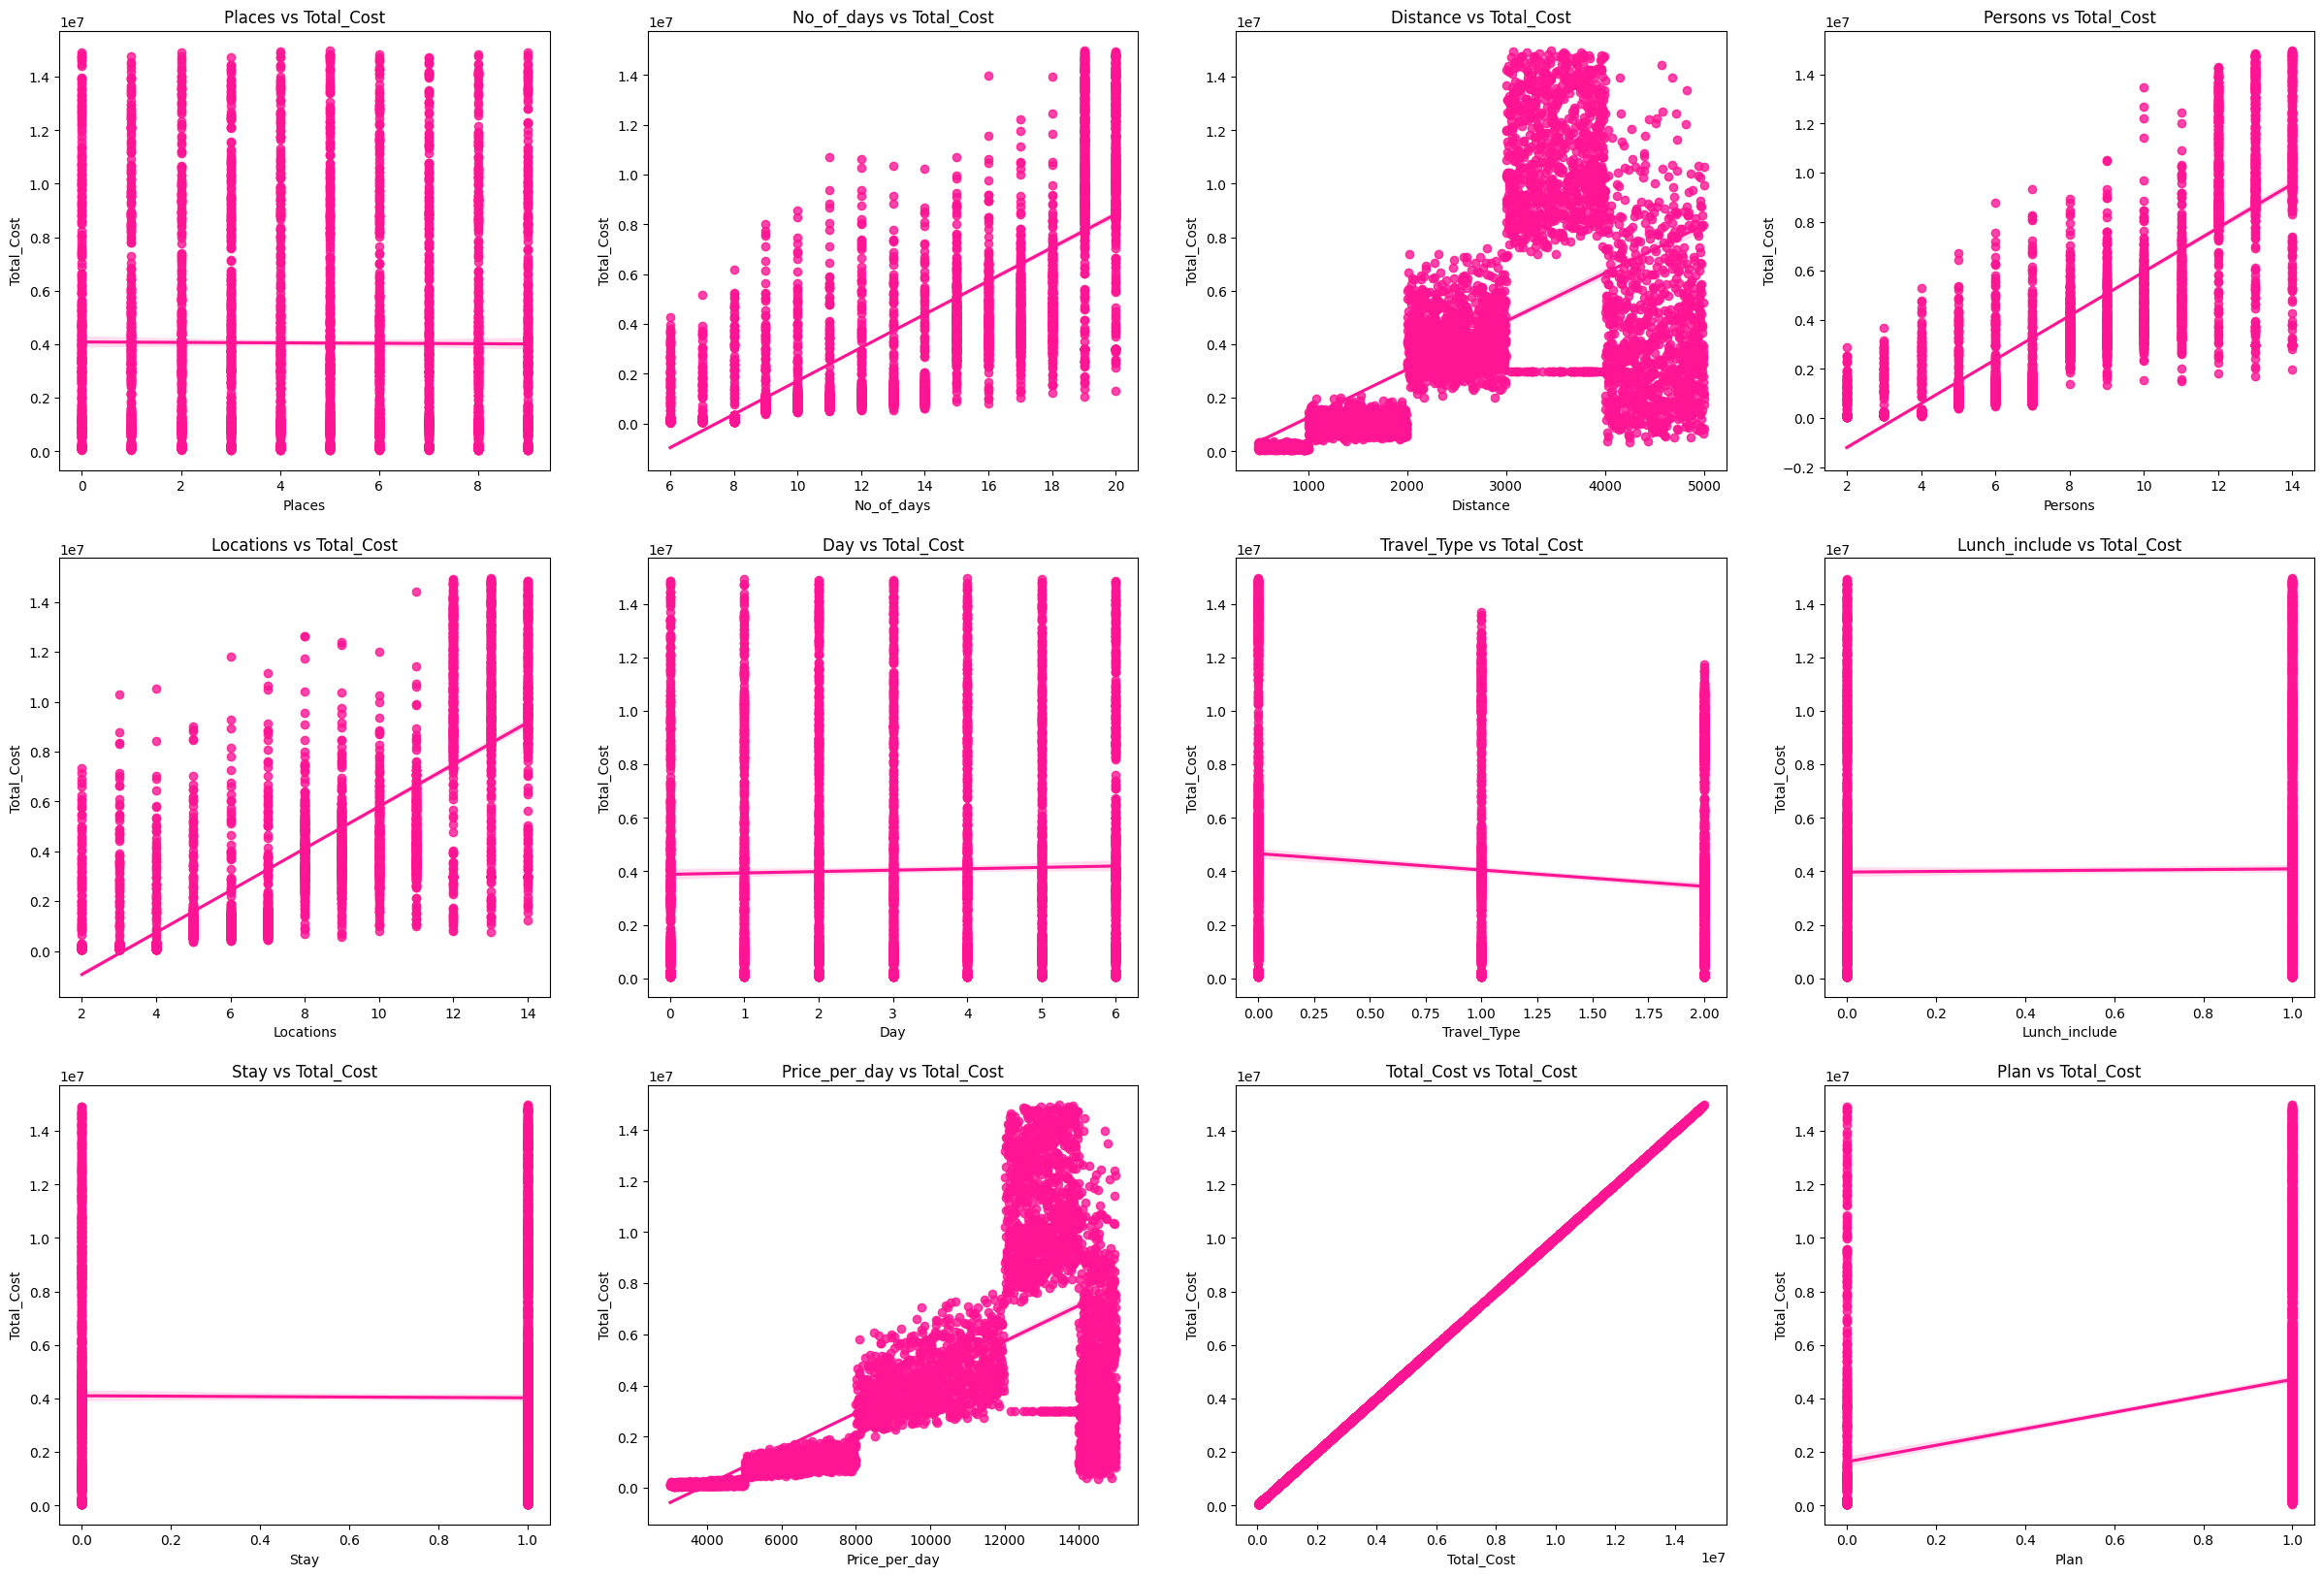

In [21]:
# Scatter plot for Target variable corr
# Calculate the number of rows and columns for subplots
col=df.select_dtypes(include=['number']).columns
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(col) // n_cols + (1 if len(col) % n_cols != 0 else 0))  # Number of rows
# Create the subplot grid
plt.figure(figsize=(30, 20))
for idx, col in enumerate(col, 1):
    plt.subplot(n_rows, n_cols, idx)  # Use n_rows and n_cols
    sns.regplot(data=df, x=col, y="Total_Cost", color="deeppink")
    plt.title(f"{col} vs Total_Cost")  # Add title to each subplot
plt.show()

In [22]:
df2=df.copy()
df2

,Places,No_of_days,Distance,Persons,Locations,Day,Travel_Type,Lunch_include,Stay,Price_per_day,Total_Cost,Plan
0,4,7,761,4,3,1,0,0,1,3133,184078.0,0
1,0,6,737,3,3,3,1,0,1,4166,125601.0,0
2,4,6,707,2,2,2,1,1,0,4254,78705.0,0
3,4,7,894,4,2,1,0,0,1,4008,220062.0,1
4,3,7,754,4,4,4,2,0,0,3255,137215.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,11,4317,2,5,6,2,1,1,14697,694375.0,1
4996,2,15,4974,13,5,5,0,0,1,14331,8473715.0,1
4997,1,6,4647,3,12,0,0,0,1,14421,1254672.0,1
4998,7,9,4160,13,14,2,0,0,1,14442,7752136.0,1


In [23]:
df.corr()["Total_Cost"].sort_values(ascending=False)

Total_Cost       1.000000
Persons          0.837433
No_of_days       0.783670
Locations        0.783529
Price_per_day    0.679796
Distance         0.603135
Plan             0.309271
Day              0.024932
Lunch_include    0.014187
Places          -0.005651
Stay            -0.008528
Travel_Type     -0.134029
Name: Total_Cost, dtype: float64

## Split DataSet

In [24]:
df.columns

Index(['Places', 'No_of_days', 'Distance', 'Persons', 'Locations', 'Day',
       'Travel_Type', 'Lunch_include', 'Stay', 'Price_per_day', 'Total_Cost',
       'Plan'],
      dtype='object')

In [26]:
# Split DataSet
SEED = 70
np.random.seed(SEED)
random.seed(SEED)
X=df[[ 'No_of_days', 'Distance', 'Persons', 'Locations']]  # Input Data
y=df.Total_Cost                  # Output Data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED)

In [27]:
# Evaluate Regression Models
LR=LinearRegression()
KNN=KNeighborsRegressor()
DT=DecisionTreeRegressor(random_state=SEED)
RF=RandomForestRegressor(random_state=SEED)
ADB = AdaBoostRegressor(random_state=SEED)
GBR=GradientBoostingRegressor(random_state=SEED) # 91.7
XGB = XGBRegressor(random_state=SEED)
Models={'LR':LR,'KNN':KNN,'DT':DT,'RF':RF,"ADB":ADB,'GBR':GBR, "XGB":XGB}
# Apply Models
for Model_name,Model in Models.items():
  Model.fit(x_train,y_train)
  y_pred=Model.predict(x_test)
  print(Model_name)
  print('Training_score',Model.score(x_train,y_train))
  print('Testing_score',Model.score(x_test,y_test))
  print('R2 score',r2_score(y_test,y_pred))
  print('--------------------------------------------------')

LR
Training_score 0.7715380236591665
Testing_score 0.8063300081718349
R2 score 0.8063300081718349
--------------------------------------------------
KNN
Training_score 0.8815839280065001
Testing_score 0.85578427230675
R2 score 0.85578427230675
--------------------------------------------------
DT
Training_score 0.9982716760649869
Testing_score 0.8431965608608396
R2 score 0.8431965608608396
--------------------------------------------------
RF
Training_score 0.9773682854170498
Testing_score 0.9080779171738922
R2 score 0.9080779171738922
--------------------------------------------------
ADB
Training_score 0.8447843691352815
Testing_score 0.8627225332835606
R2 score 0.8627225332835606
--------------------------------------------------
GBR
Training_score 0.8898524975405592
Testing_score 0.917301331114692
R2 score 0.917301331114692
--------------------------------------------------
XGB
Training_score 0.9433734985903083
Testing_score 0.8931060004532937
R2 score 0.8931060004532937
----------

In [30]:
GBR=GradientBoostingRegressor(random_state=SEED,n_estimators= 100, min_samples_split= 30, 
                              max_depth= 5, learning_rate= 0.1) # 0.9188
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
print('Training_score',GBR.score(x_train,y_train))
print('Testing_score',GBR.score(x_test,y_test))
print('R2 score',r2_score(y_test,y_pred))

Training_score 0.9166736011458092
Testing_score 0.9222699441132027
R2 score 0.9222699441132027


In [28]:
## GradiantBoost Class
gradient_params={"learning_rate":[0.1,0.3,0.5],
                 "n_estimators": [100, 150, 200,300],
                 "min_samples_split": [2, 5, 10, 20,30],
                 "max_depth": [5, 8, 10, 15,25]}
randomcv_models = [ ("GradientBoost",GradientBoostingRegressor(random_state=SEED),gradient_params)]

In [29]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,
                                n_iter=50,cv=3,scoring="r2",n_jobs=-1)  # f1 for classification
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for GradientBoost -------------------
{'n_estimators': 100, 'min_samples_split': 30, 'max_depth': 5, 'learning_rate': 0.1}


In [31]:
# GBR Perform well
data = df[['No_of_days', 'Distance', 'Persons', 'Locations',"Total_Cost"]].tail(2000).head(10)
data

,No_of_days,Distance,Persons,Locations,Total_Cost
3000,20,3502,14,12,9692984.0
3001,20,3132,12,13,8594034.0
3002,19,3265,13,14,13850320.0
3003,19,3124,13,12,10397072.0
3004,20,3384,12,14,12539873.0
3005,20,3218,14,12,2984378.0
3006,20,3405,12,14,13647786.0
3007,20,3507,12,12,12959966.0
3008,20,3074,14,14,9893431.0
3009,19,3149,14,14,9594709.0


In [32]:
# Random Forest Perform Well
test_data = [
[20,3502,14,12],
[20,3132,12,13],
[19,3265,13,14],
[19,3124,13,12],
[20,3384,12,14],
[20,3218,12,14],
[20,3405,12,14],
[20,3507,12,12],
[20,3074,14,14],
[19,3149,14,14]]
y_pred1 = GBR.predict(test_data)
print(y_pred1)

[10527181.02997335  9869089.6281658  11748287.62793629 10524111.74892452
 11395812.34213464 10800787.25723932 10876090.79835643 11449181.18512616
  8677597.71440168 10480657.48876782]


In [33]:
data["Total_Cost"]

3000     9692984.0
3001     8594034.0
3002    13850320.0
3003    10397072.0
3004    12539873.0
3005     2984378.0
3006    13647786.0
3007    12959966.0
3008     9893431.0
3009     9594709.0
Name: Total_Cost, dtype: float64

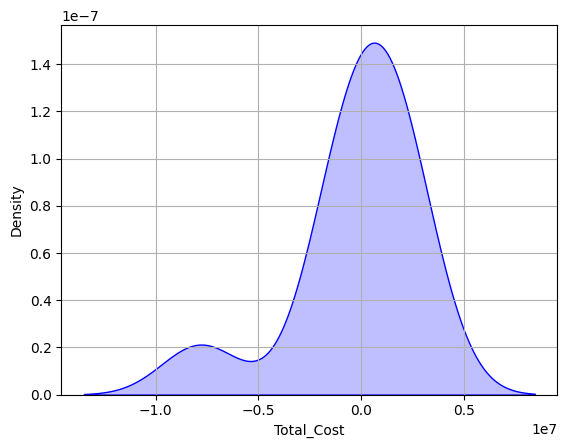

In [34]:
kde=(data["Total_Cost"]-y_pred1)
sns.kdeplot(kde,fill=True,color="blue")
plt.grid()
plt.show()

In [36]:
data2 = df[['No_of_days', 'Distance', 'Persons', 'Locations',"Total_Cost"]].tail(1000).head(10)
data2

,No_of_days,Distance,Persons,Locations,Total_Cost
4000,11,4965,5,9,2282897.0
4001,17,4817,10,14,12229562.0
4002,18,4458,11,3,4874964.0
4003,14,4875,2,13,1367951.0
4004,15,4686,11,11,9858080.0
4005,17,4155,7,5,3285930.0
4006,11,4673,14,14,10706580.0
4007,6,4840,5,3,864146.0
4008,6,4580,6,3,987418.0
4009,7,4551,6,8,1619941.0


In [37]:
# GBR Perform Well
test_data2 = [
[11,4965,5,9],
[17,4817,10,14],
[18,4458,11,3],
[14,4875,2,13],
[15,4686,11,11],
[17,4155,7,5],
[11,4673,14,14],
[6,4840,5,3],
[6,4580,6,3],
[7,4551,6,8]]
y_pred2 = GBR.predict(test_data2)
print(y_pred2)

[ 2899357.47931742 10203538.1399477   5610279.18502915  1482856.69843565
  6667936.16772845  3950525.95511195  8716252.71583913  1062261.06586011
  1278238.79768043  2037596.55316029]


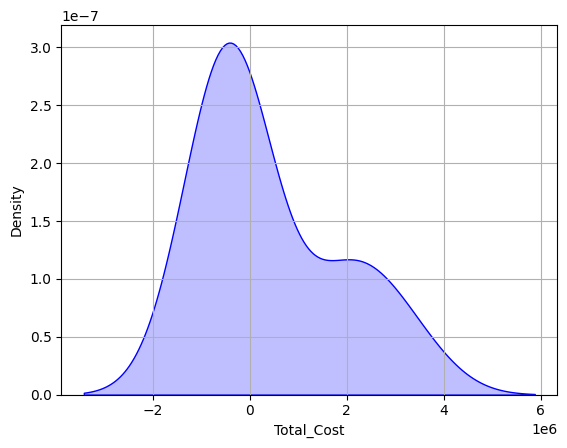

In [38]:
kde=(data2["Total_Cost"]-y_pred2)
sns.kdeplot(kde,fill=True,color="blue")
plt.grid()
plt.show()

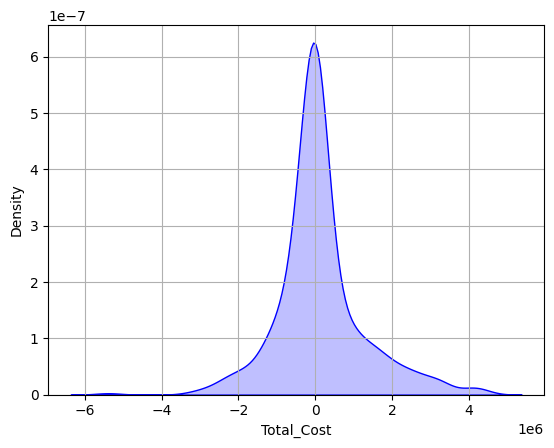

In [39]:
# KDE Plot Recidual
kde=(y_test-y_pred)
sns.kdeplot(kde,fill=True,color="blue")
plt.grid()
plt.show()

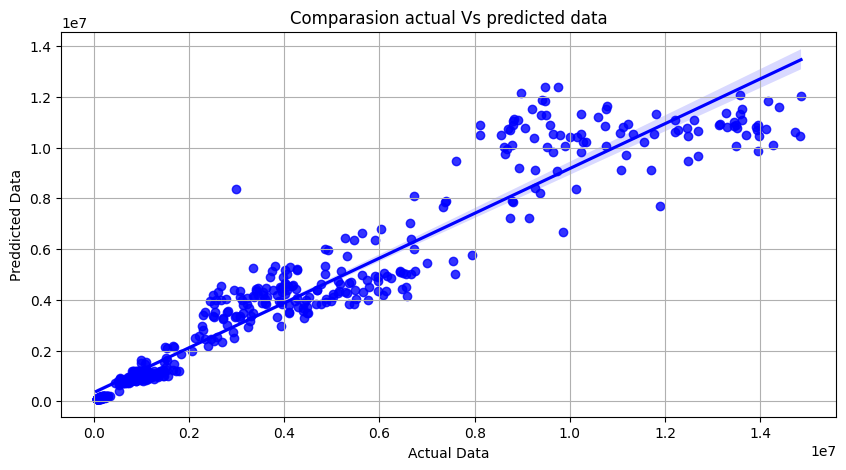

In [40]:
# Actual vs Predict Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,color="blue")
plt.title("Comparasion actual Vs predicted data")
plt.xlabel("Actual Data")
plt.ylabel("Preddicted Data")
plt.grid()
plt.show()

In [41]:
import pickle

# Save the model to a .pkl file
with open("Vacation_price.pkl", "wb") as f:
    pickle.dump(GBR, f)

print("Model saved as Vacation_price.pkl")


Model saved as Vacation_price.pkl


In [43]:
# Load the model
with open("Vacation_price.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test prediction
sample_input = [[11,4965,5,9]]  # Replace with actual feature values
prediction = loaded_model.predict(sample_input)
print("Prediction:", prediction)


Prediction: [2899357.47931742]
